In [1]:
import numpy as np
# import matplotlib.pylab as plt
import matplotlib.pyplot as plt

In [2]:
def step_function(x):
    return np.array(x > 0, dtype = int)

In [3]:
x = np.arange(-5.0, 5.0, 0.1)
y = step_function(x)

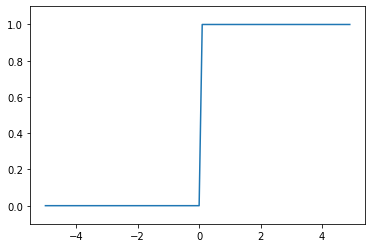

In [4]:
plt.plot(x, y)
plt.ylim(-0.1, 1.1)
plt.show()

### 实现 1 个 3 层神经网络

In [5]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [6]:
x = np.array([-0.1, 1.0, 2.0])
sigmoid(x)

array([0.47502081, 0.73105858, 0.88079708])

In [7]:
def relu(x):
    return np.maximum(0, x)

In [8]:
np.array([7, 8]).shape

(2,)

In [9]:
X = np.array([1.0, 0.5])
W1 = np.array([[0.1, 0.3, 0.5], [0.2, 0.4, 0.6]])
B1 = np.array([0.1, 0.2, 0.3])

In [10]:
print(W1.shape)

(2, 3)


In [11]:
print(X.shape)

(2,)


In [12]:
print(B1.shape)

(3,)


In [13]:
A1 = np.dot(X, W1) + B1

In [14]:
print(A1)

[0.3 0.7 1.1]


In [15]:
Z1 = sigmoid(A1)

In [16]:
print(Z1)

[0.57444252 0.66818777 0.75026011]


In [17]:
W2 = np.array([[0.1, 0.4], [0.2, 0.5], [0.3, 0.6]])
B2 = np.array([0.1, 0.2])

In [18]:
A2 = np.dot(Z1, W2) + B2
Z2 = sigmoid(A2)

In [19]:
print(Z2)

[0.62624937 0.7710107 ]


In [20]:
def identity_function(x):
    return x

W3 = np.array([[0.1, 0.3], [0.2, 0.4]])
B3 = np.array([0.1, 0.2])

In [21]:
A3 = np.dot(Z2, W3) + B3
Y = identity_function(A3)

In [22]:
print(Y)

[0.31682708 0.69627909]


### Softmax

In [23]:
a = np.array([0.3, 2.9, 4.0])

exp_a = np.exp(a)
print(exp_a)

[ 1.34985881 18.17414537 54.59815003]


In [24]:
sum_exp_a = np.sum(exp_a)

In [25]:
y = exp_a / sum_exp_a
print(y)

[0.01821127 0.24519181 0.73659691]


In [26]:
def softmax(a):
    exp_a = np.exp(a)
    sum_exp_a = np.sum(exp_a)
    y = exp_a / sum_exp_a
    
    return y

In [27]:
# 问题：溢出

a = np.array([1010, 1000, 990])
print(softmax(a))

[nan nan nan]


C:\Users\admin\AppData\Local\Temp/ipykernel_5692/3205042874.py:2: RuntimeWarning: overflow encountered in exp
  exp_a = np.exp(a)
C:\Users\admin\AppData\Local\Temp/ipykernel_5692/3205042874.py:4: RuntimeWarning: invalid value encountered in true_divide
  y = exp_a / sum_exp_a


In [28]:
c = np.max(a)
a - c

array([  0, -10, -20])

In [29]:
np.exp(a - c) / np.sum(np.exp(a - c))

array([9.99954600e-01, 4.53978686e-05, 2.06106005e-09])

In [30]:
# 通过同时加减一个常数（信号最大值）解决
def softmax(a):
    c = np.max(a)
    exp_a = np.exp(a - c)
    sum_exp_a = np.sum(exp_a)
    y = exp_a / sum_exp_a
    
    return y

In [31]:
softmax(np.array([0.3, 2.9, 4.0]))

array([0.01821127, 0.24519181, 0.73659691])

### MNIST 训练

In [32]:
import sys, os
sys.path.append(os.pardir)

from dataset.mnist import load_mnist

In [33]:
(x_train, t_train), (x_test, t_test) = load_mnist(flatten=True, normalize=False)

Converting train-images-idx3-ubyte.gz to NumPy Array ...
Done
Converting train-labels-idx1-ubyte.gz to NumPy Array ...
Done
Converting t10k-images-idx3-ubyte.gz to NumPy Array ...
Done
Converting t10k-labels-idx1-ubyte.gz to NumPy Array ...
Done
Creating pickle file ...
Done!


In [35]:
print(x_train.shape)

(60000, 784)


In [36]:
print(t_train.shape)

(60000,)


In [37]:
print(x_test.shape)
print(t_test.shape)

(10000, 784)
(10000,)


In [38]:
from PIL import Image

In [39]:
def img_show(img):
    pil_img = Image.fromarray(np.uint8(img))
    pil_img.show()

In [40]:
img = x_train[0]

In [41]:
label = t_train[0]
print(label)

5


In [42]:
print(img.shape)

(784,)


In [43]:
img = img.reshape(28, 28)

In [44]:
img

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [47]:
np.uint8(img).shape

(28, 28)

In [49]:
img_show(img)

In [52]:
def get_data():
    (x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, flatten=True, one_hot_label=False)
    return x_test, t_test

def init_network():
    import pickle
    with open("sample_weight.pkl", "rb") as f:
        network = pickle.load(f)
        
    return network


def predict(network, x):
    W1, W2, W3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']
    a1 = np.dot(x, W1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, W2) + b2
    z2 = sigmoid(a2)
    a3 = np.dot(z2, W3) + b3
    y = softmax(a3)
    
    return y

In [53]:
x, t =  get_data()
network = init_network()

In [55]:
accuracy_cnt = 0
for i in range(len(x)):
    y = predict(network, x[i])
    p = np.argmax(y)
    if p == t[i]:
        accuracy_cnt += 1
        
print("Accuracy: " + str(float(accuracy_cnt) / len(x)))

Accuracy: 0.9352


In [57]:
# 批处理
batch_size = 100
accuracy_cnt = 0

for i in range(0, len(x), batch_size):
    x_batch = x[i:i+batch_size]
    y_batch = predict(network, x_batch)
    p = np.argmax(y_batch, axis = 1)
    accuracy_cnt += np.sum(p == t[i:i+batch_size])
        
print("Accuracy: " + str(float(accuracy_cnt) / len(x)))

Accuracy: 0.9352


In [58]:
x.shape

(10000, 784)